In [1]:
# Import Libraries
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline 

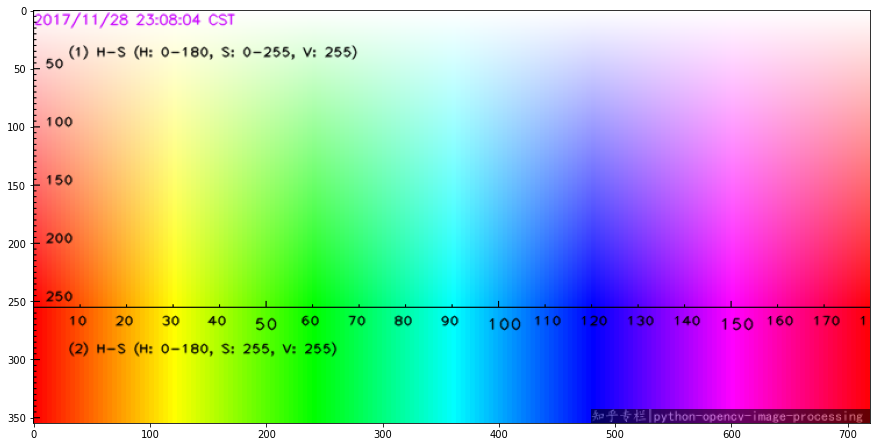

In [2]:
# Display HSV ColorMap as a helper for selecting color pixels
colormap = cv2.imread('img/hsv.png')
colormap_rgb = cv2.cvtColor(colormap, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,10))
plt.imshow(colormap_rgb)

Text(0.5, 1.0, 'Blue-Green-Red M&M')

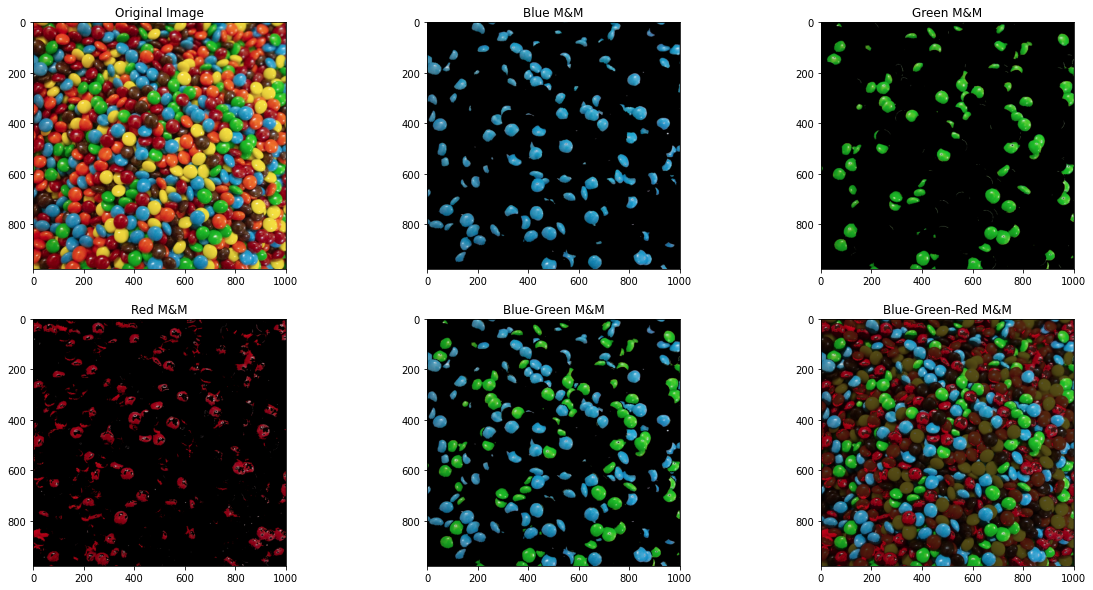

In [3]:
# Read the Image
img = cv2.imread('img/mm.png')
# Convert the image from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Convert the image from BGR to HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Creating a subplots of all the figures
fig, ax = plt.subplots(2,3, figsize=(20,10))

# Displaying the Original Image
ax[0][0].imshow(img_rgb)
ax[0][0].set_title("Original Image")

# We want to see only the blue ones
hsv_blue = img_hsv.copy()
# Selecting the Upper and Lower Bounds for Blue
lower_bounds = (95, 18, 120)
upper_bounds = (145, 255, 255)

mask_blue = cv2.inRange(hsv_blue, lower_bounds, upper_bounds)
img_masked_blue = img_rgb.copy()
img_masked_blue[mask_blue == 0] = [0, 0, 0]

ax[0][1].imshow(img_masked_blue)
ax[0][1].set_title("Blue M&M")

# We want to see only the green ones
hsv_green = img_hsv.copy()
# Selecting the Upper and Lower Bounds for Green
lower_bounds = (40, 20, 120)
upper_bounds = (70, 255, 255)
mask_green = cv2.inRange(hsv_green, lower_bounds, upper_bounds)
img_masked_green = img_rgb.copy()
img_masked_green[mask_green == 0] = [0, 0, 0]

ax[0][2].imshow(img_masked_green)
ax[0][2].set_title("Green M&M")

# We want to see only the red ones
hsv_red = img_hsv.copy()
# Selecting the Upper and Lower Bounds for Red
lower_bounds = (170, 20, 120)
upper_bounds = (180, 255, 255)
mask_red = cv2.inRange(hsv_red, lower_bounds, upper_bounds)
img_masked_red = img_rgb.copy()
img_masked_red[mask_red == 0] = [0, 0, 0]

ax[1][0].imshow(img_masked_red)
ax[1][0].set_title("Red M&M")

# We want to see the blue and green
# We can do it using the bitwise OR operator
blue_and_green = cv2.bitwise_or(img_masked_blue, img_masked_green)

ax[1][1].imshow(blue_and_green)
ax[1][1].set_title("Blue-Green M&M")

# We want to see Blue, Green and Red and others will be faded.
mask = cv2.bitwise_or(blue_and_green, img_masked_red)
final_img = img_rgb.copy()
final_img[mask == 0] = final_img[mask==0]*0.35

ax[1][2].imshow(final_img)
ax[1][2].set_title("Blue-Green-Red M&M")
